In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [19]:
def generate_dual_gaussian(
    mean1, sigma1, mean2, sigma2, num_points, weights=(0.5, 0.5)
):
    """
    Generates a mixture of two Gaussian distributions with specified parameters

    Parameters:
    mean1 (float): Mean of first Gaussian
    sigma1 (float): Standard deviation of first Gaussian
    mean2 (float): Mean of second Gaussian
    sigma2 (float): Standard deviation of second Gaussian
    num_points (int): Total number of data points
    weights (tuple): Mixing weights for the two Gaussians (sum to 1)

    Returns:
    np.ndarray: Array of combined data points
    """
    # Validate input weights
    if not np.isclose(sum(weights), 1.0, atol=1e-9):
        raise ValueError("Weights must sum to 1.0")

    # Calculate number of points for each distribution
    n1 = int(num_points * weights[0])
    n2 = num_points - n1

    # Generate distributions
    dist1 = np.random.normal(mean1, sigma1, n1)
    dist2 = np.random.normal(mean2, sigma2, n2)

    # Combine and shuffle
    combined = np.concatenate([dist1, dist2])
    np.random.shuffle(combined)

    return combined

In [20]:
folder = "/Users/gmgao/Dropbox/Caltech_PostDoc_GuttmanLab/Slides/GroupMeeting-20250605"
os.chdir(folder)

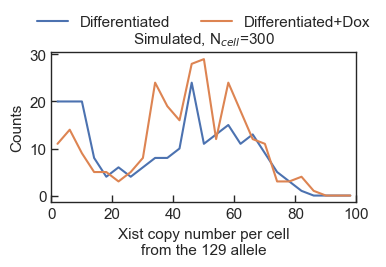

In [106]:
# mean1, sigma1, mean2, sigma2, num_points, weights=(0.5, 0.5)
N_data = 300
sigma1 = 10
sigma2 = 15
weights_control = (0.5, 0.5)
weights_Dox = (0.25, 0.75)
data_control = generate_dual_gaussian(0, sigma1, 50, sigma2, N_data, weights_control)
data_Dox = generate_dual_gaussian(0, sigma1, 50, sigma2, N_data, weights_Dox)
data1 = data_control
data2 = data_Dox
label1 = "Differentiated"
label2 = "Differentiated+Dox"
bins = 25
x_max = 100
hist_A, bins_edge = np.histogram(data1, bins=bins, range=(0, x_max))
hist_B, bins_edge = np.histogram(data2, bins=bins, range=(0, x_max))
midpoints = (bins_edge[:-1] + bins_edge[1:]) / 2
plt.figure(figsize=(4, 3))
# plot data
plt.plot(midpoints, hist_A, label=label1)
plt.plot(midpoints, hist_B, label=label2)
# plot ground truth
plt.xlim(0, x_max)
plt.legend(frameon=False, loc='center', bbox_to_anchor=[0.5, 1.2], ncol=2)
# adjust
plt.title(r"Simulated, N$_{cell}$=" + f"{data1.size:,}", fontsize=11)
plt.xlabel("Xist copy number per cell\nfrom the 129 allele", fontsize=11)
plt.ylabel(r"Counts", fontsize=11)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=11,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.tight_layout()
plt.savefig("simulation-Dox_case-hist-sparse.png", format="png", dpi=300)

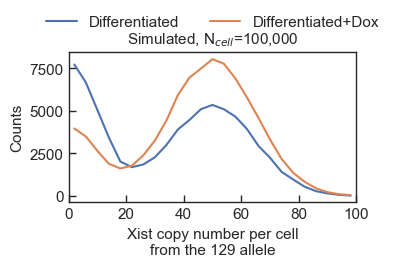

In [108]:
# mean1, sigma1, mean2, sigma2, num_points, weights=(0.5, 0.5)
N_data = 100000
sigma1 = 10
sigma2 = 15
weights_control = (0.5, 0.5)
weights_Dox = (0.25, 0.75)
data_control = generate_dual_gaussian(0, sigma1, 50, sigma2, N_data, weights_control)
data_Dox = generate_dual_gaussian(0, sigma1, 50, sigma2, N_data, weights_Dox)
data1 = data_control
data2 = data_Dox
label1 = "Differentiated"
label2 = "Differentiated+Dox"
bins = 25
x_max = 100
hist_A, bins_edge = np.histogram(data1, bins=bins, range=(0, x_max))
hist_B, bins_edge = np.histogram(data2, bins=bins, range=(0, x_max))
midpoints = (bins_edge[:-1] + bins_edge[1:]) / 2
plt.figure(figsize=(4, 3))
# plot data
plt.plot(midpoints, hist_A, label=label1)
plt.plot(midpoints, hist_B, label=label2)
# plot ground truth
plt.xlim(0, x_max)
plt.legend(frameon=False, loc='center', bbox_to_anchor=[0.5, 1.2], ncol=2)
# adjust
plt.title(r"Simulated, N$_{cell}$=" + f"{data1.size:,}", fontsize=11)
plt.xlabel("Xist copy number per cell\nfrom the 129 allele", fontsize=11)
plt.ylabel(r"Counts", fontsize=11)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=11,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.tight_layout()
plt.savefig("simulation-Dox_case-hist-dense.png", format="png", dpi=300)

In [116]:
def discrete_state_spectrum(num_points, mean_range=(0, 50), sigma_range=(5, 5)):
    """
    Simulates expression spectrum with fixed integer means (0-50) but random weights
    and variances, mimicking quantized transcriptional states with stochastic dominance

    Parameters:
    num_points (int): Total simulated cells
    mean_range (tuple): Inclusive (min, max) integer means
    sigma_range (tuple): (min, max) for component std devs

    Returns:
    np.ndarray: Simulated copy numbers with biological noise characteristics
    """
    # Create array of integer means from 0 to 50
    means = np.arange(mean_range[0], mean_range[1] + 1)
    n_components = len(means)

    # Generate random parameters with biological constraints
    sigmas = np.random.uniform(*sigma_range, n_components)
    weights = np.random.dirichlet(np.ones(n_components))  # Uniform weight distribution

    # Allocate points using multinomial distribution
    counts = np.random.multinomial(num_points, weights)

    # Generate subpopulations with protection against empty clusters
    samples = np.concatenate(
        [
            np.random.normal(mu, sigma, n)
            for mu, sigma, n in zip(means, sigmas, counts)
            if n > 0  # Skip means with zero allocation
        ]
    )

    np.random.shuffle(samples)
    return samples

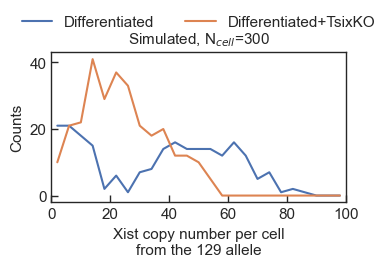

In [117]:
N_data = 300
sigma1 = 10
sigma2 = 15
weights_control = (0.5, 0.5)
weights_Dox = (0.25, 0.75)
data_control = generate_dual_gaussian(0, sigma1, 50, sigma2, N_data, weights_control)
data_TsixKO = discrete_state_spectrum(N_data)
data1 = data_control
data2 = data_TsixKO
label1 = "Differentiated"
label2 = "Differentiated+TsixKO"
bins = 25
x_max = 100
hist_A, bins_edge = np.histogram(data1, bins=bins, range=(0, x_max))
hist_B, bins_edge = np.histogram(data2, bins=bins, range=(0, x_max))
midpoints = (bins_edge[:-1] + bins_edge[1:]) / 2
plt.figure(figsize=(4, 3))
# plot data
plt.plot(midpoints, hist_A, label=label1)
plt.plot(midpoints, hist_B, label=label2)
# plot ground truth
plt.xlim(0, x_max)
plt.legend(frameon=False, loc='center', bbox_to_anchor=[0.5, 1.2], ncol=2)
# adjust
plt.title(r"Simulated, N$_{cell}$=" + f"{data1.size:,}", fontsize=11)
plt.xlabel("Xist copy number per cell\nfrom the 129 allele", fontsize=11)
plt.ylabel(r"Counts", fontsize=11)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=11,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.tight_layout()
plt.savefig("simulation-Tsix_case-hist-sparse.png", format="png", dpi=300)

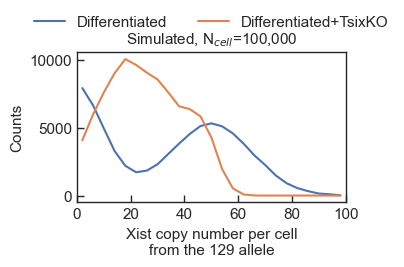

In [122]:
N_data = 100000
sigma1 = 10
sigma2 = 15
weights_control = (0.5, 0.5)
weights_Dox = (0.25, 0.75)
data_control = generate_dual_gaussian(0, sigma1, 50, sigma2, N_data, weights_control)
data_TsixKO = discrete_state_spectrum(N_data)
data1 = data_control
data2 = data_TsixKO
label1 = "Differentiated"
label2 = "Differentiated+TsixKO"
bins = 25
x_max = 100
hist_A, bins_edge = np.histogram(data1, bins=bins, range=(0, x_max))
hist_B, bins_edge = np.histogram(data2, bins=bins, range=(0, x_max))
midpoints = (bins_edge[:-1] + bins_edge[1:]) / 2
plt.figure(figsize=(4, 3))
# plot data
plt.plot(midpoints, hist_A, label=label1)
plt.plot(midpoints, hist_B, label=label2)
# plot ground truth
plt.xlim(0, x_max)
plt.legend(frameon=False, loc='center', bbox_to_anchor=[0.5, 1.2], ncol=2)
# adjust
plt.title(r"Simulated, N$_{cell}$=" + f"{data1.size:,}", fontsize=11)
plt.xlabel("Xist copy number per cell\nfrom the 129 allele", fontsize=11)
plt.ylabel(r"Counts", fontsize=11)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=11,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.tight_layout()
plt.savefig("simulation-Tsix_case-hist-dense.png", format="png", dpi=300)